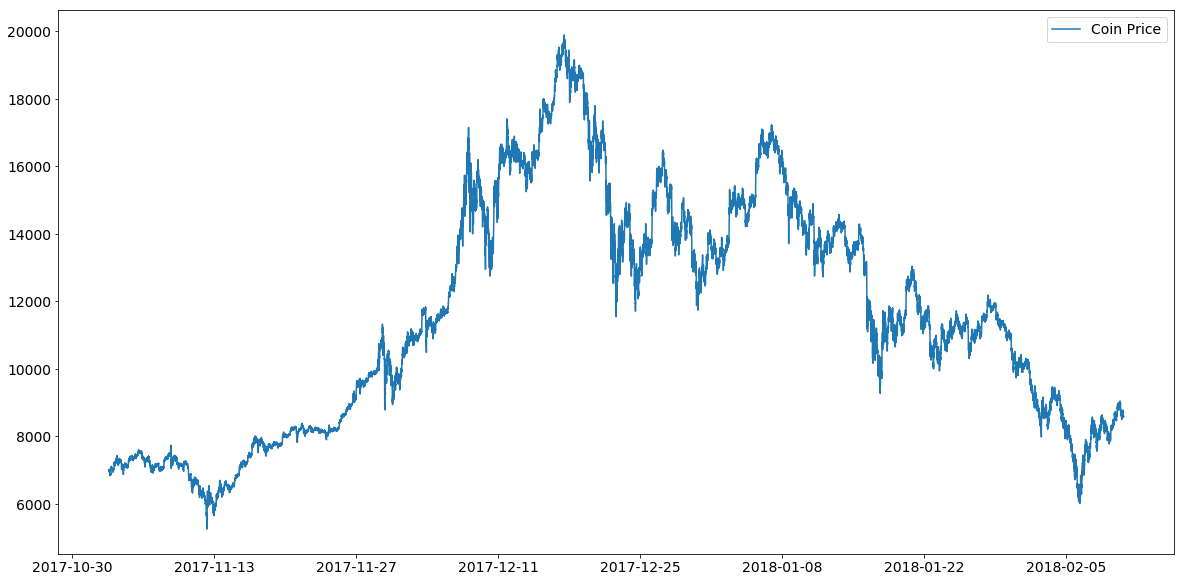

epoch       main/loss   validation/main/loss
1           0.00323836  0.624217              
2           0.000139459  0.634928              
3           0.000114712  0.635904              
4           9.87787e-05  0.641047              
5           8.81389e-05  0.642213              
6           8.10819e-05  0.64664               
7           7.61926e-05  0.650873              
8           7.28036e-05  0.654468              
9           7.04477e-05  0.653238              
10          6.87572e-05  0.656985              
11          6.74668e-05  0.659169              
12          6.65632e-05  0.660161              
13          6.58656e-05  0.661868              
14          6.53191e-05  0.666439              
15          6.47557e-05  0.667226              
16          6.43692e-05  0.66788               
17          6.40649e-05  0.669795              
18          6.37193e-05  0.67287               
19          6.3478e-05  0.677204              
20          6.31551e-05  0.675945            

In [1]:
import matplotlib.pyplot as plt
from chainer import Variable
import data_manager
import constants
import main

%matplotlib inline

df = data_manager.return_chart_data(constants.PAIR_USDT_BTC, constants.PERIOD, constants.DAY)

time_train, time_cv, time_test, x_train, y_train, x_cv, y_cv, x_test, y_test_not_normalized, y_scaler = data_manager.prepare_data(df)

trainer, model = main.initialize_trainer(x_train, y_train, x_cv, y_cv)
trainer.run()

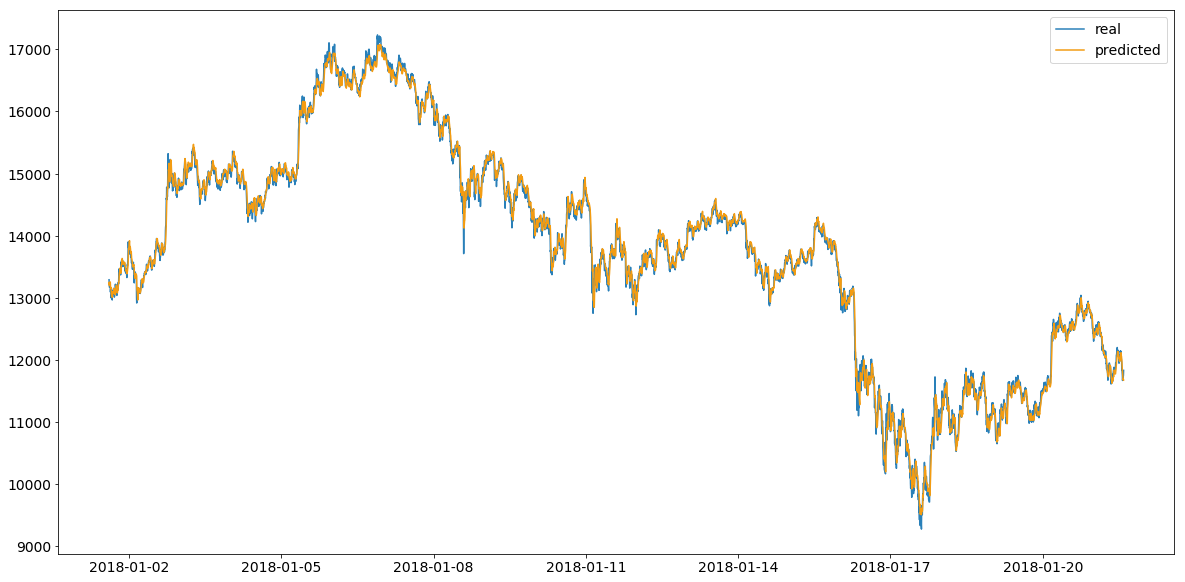

In [2]:
model.reset_state()
y_pred_cv = model.predict(Variable(x_cv)).data
# CVの予測値をプロット
plt.figure(figsize=(20,10))
plt.plot(time_cv, y_scaler.inverse_transform(y_cv), color='#2980b9', label = "real") # 実測値は青色
plt.plot(time_cv, y_scaler.inverse_transform(y_pred_cv), color='#f39c12', label = "predicted") # 予測値はオレンジ
plt.legend(loc='best', fontsize=14)
plt.tick_params(labelsize=14)
plt.show()